---
# **Data Description and Background:**

---

### High-Level Summary of the 2020 US Census Dataset

Note: the below data description is a summary of the kaggle data source. For a more detailed description please follow this link:

Source:

https://www.kaggle.com/datasets/zusmani/us-census-2020

#### Overview:
The 2020 US Census dataset is an extensive and comprehensive dataset encompassing the 24th decennial United States Census. Released publicly on August 12, 2021, the dataset provides a detailed snapshot of the demographic, geographic, and social attributes of the US population across all 50 states. The dataset includes approximately 12 GB of data and covers a wide array of variables that are essential for analyzing population trends, demographic shifts, and geographic distributions.

#### Content:
The dataset is composed of 50 files corresponding to each state. Each file contains numerous columns representing various geographic, demographic, and statistical attributes. The dataset includes over 400 columns, capturing detailed information such as:

- **Geographic Identifiers**: GEOID, GEOCODE, STATE (FIPS), COUNTY (FIPS), Census Tracts, and more.
- **Demographic Information**: Population counts by race, ethnicity, and combinations of racial groups.
- **Housing Data**: Housing unit counts, vacancy status, and types of housing structures.
- **Legislative and Political Boundaries**: Congressional districts, state legislative districts, and voting districts.
- **Urban and Rural Designations**: Urban areas, rural designations, and urban growth areas.
- **Institutional Data**: Counts of institutionalized populations, such as those in correctional facilities or nursing homes.
- **Regional Classifications**: Metropolitan and micropolitan areas, New England city and town areas, and regions.

#### Acknowledgements:
The dataset has been sourced from the US Census website and prepared for use on Kaggle by cleaning and organizing the data for accessibility, with no changes made to the original data.

Source:

https://www.kaggle.com/datasets/zusmani/us-census-2020


---

# **Write-up:**

---

## 1. Unsupervised Learning Problem Identification

**Problem Statement:**
The 2020 US Census dataset provides an opportunity to explore demographic patterns across the United States. This project focuses on the state of Colorado, aiming to uncover hidden patterns in the population through clustering analysis. By applying unsupervised learning techniques, we can identify distinct demographic segments within Colorado, which could inform policymakers, businesses, and community organizations about regional differences in population characteristics. This analysis is particularly relevant for understanding how different racial and ethnic groups are distributed across the state and how these distributions might influence various marketing strategies.

## 2. Data Collection and Cleaning Methods

The data for this project was sourced from the 2020 US Census, which offers a comprehensive snapshot of the US population. The dataset is publicly available on Kaggle and includes detailed demographic information for all states. For this analysis, the Colorado-specific file was extracted, providing demographic, geographic, and housing data at the census tract level. Before proceeding with the analysis, the data underwent preprocessing, including cleaning, handling missing values, and ensuring consistency in geographic identifiers, which are critical for accurate merging with geospatial data.

## 3. Model Building and Training Discussion

**Model Selection and Hyperparameter Tuning:**
In this analysis, K-Means clustering was chosen as the primary unsupervised learning method due to its simplicity and effectiveness in identifying distinct groups within the dataset. K-Means was applied to the standardized demographic data, and the number of clusters was determined based on the data's distribution. Additionally, Principal Component Analysis (PCA) and t-SNE were used for dimensionality reduction and visualization. PCA helped in understanding the variance explained by different components, while t-SNE provided a non-linear mapping that highlighted the separation between clusters. Hyperparameters, such as the number of clusters for K-Means and the perplexity for t-SNE, were carefully tuned to optimize the model's performance.

## 4. Results and Discussion

**Results Interpretation:**
The clustering analysis revealed several distinct demographic groups within Colorado. The clusters varied significantly in terms of racial and ethnic composition, with some clusters showing strong concentrations of specific demographic groups. For example, one cluster predominantly represented areas with a high Latino population, while others were more diverse or homogeneously composed of White or African American populations. The PCA and t-SNE visualizations provided further insights into the structure of the data, showing that certain clusters were well-separated, indicating clear demographic distinctions, while others overlapped, suggesting similarities in population characteristics. These findings can be valuable for targeted policy interventions and resource allocation.

## 5. Conclusion

**Conclusion:**
This analysis of Colorado's 2020 Census data using unsupervised learning techniques, specifically K-Means clustering, PCA, and t-SNE, has successfully identified distinct demographic segments within the state. The clusters revealed clear patterns in the distribution of racial and ethnic groups, which are critical for understanding the socio-economic dynamics of different regions. The well-separated clusters indicate areas with unique demographic characteristics, while the overlapping clusters suggest regions with shared population traits. These insights are valuable for a wide range of applications, from policymaking and community planning to business strategy. Future work could involve exploring additional clustering methods, such as DBSCAN or Gaussian Mixture Models, and considering more detailed socio-economic variables to further refine the analysis. Overall, this project demonstrates the power of unsupervised learning in extracting meaningful patterns from complex demographic data.


---
# **Notebook:**


---

# **The below EDA and Unsupervised analysis is focused on one state: Colorado.**
## This state can be downloaded by going to the data explorer within the below link on Kaggle and downloading the file Colorado_CO.csv
https://www.kaggle.com/datasets/zusmani/us-census-2020?select=Colorado_CO.csv

# **Data Loading and Initial Setup**

# Before Unsupervised Learning can begin it is necessary to import python libraries and set up the environment. This notebook is built to run on Google Colab.

# Google Drive is mounted below. This is to gain access the dataset and related files. To change this csv file to load locally you first need to comment out the google colab mount drive line. Then where it loads the csv from a directory path just change the path to your local path.



In [1]:
# Standard libraries
import numpy as np
import pandas as pd

# Geospatial libraries
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Widgets and display libraries
import ipywidgets as widgets
from IPython.display import display, clear_output

# Google Colab specific imports
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploratory Data Analysis (EDA)**

# This section involves loading the dataset into a Pandas DataFrame and performing initial exploratory data analysis.
# EDA is essential for understanding the basic structure, distribution, and characteristics of the data.
# It helps in identifying potential issues like missing values, outliers, and provides a statistical summary of the data.


In [2]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Unsupervised_Machine_Learning/Colorado_CO.csv')

display(data)

<ipython-input-2-c0a619899df6>:2: DtypeWarning: Columns (3,9,18,30,36,38,44,45,57,58,78,86,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Unsupervised_Machine_Learning/Colorado_CO.csv')


,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,CIFSN_x,LOGRECNO,GEOID,GEOCODE,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,CO,50,0,0,0,0,2,0500000US08001,8001,...,4464,3125,1485,86,1547,7,1339,0,0,1339
1,PLST,CO,50,0,0,0,0,3,0500000US08003,8003,...,941,264,136,0,128,0,677,614,0,63
2,PLST,CO,50,0,0,0,0,4,0500000US08005,8005,...,5398,3764,1118,103,2540,3,1634,36,334,1264
3,PLST,CO,50,0,0,0,0,5,0500000US08007,8007,...,89,64,15,0,49,0,25,0,0,25
4,PLST,CO,50,0,0,0,0,6,0500000US08009,8009,...,37,37,1,0,36,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217398,PLST,CO,970,0,0,0,0,217400,9700000US0807290,807290,...,0,0,0,0,0,0,0,0,0,0
217399,PLST,CO,970,0,0,0,0,217401,9700000US0807320,807320,...,0,0,0,0,0,0,0,0,0,0
217400,PLST,CO,970,0,0,0,0,217402,9700000US0807350,807350,...,309,152,0,0,152,0,157,28,0,129
217401,PLST,CO,970,0,0,0,0,217403,9700000US0807380,807380,...,121,33,20,0,0,13,88,0,0,88


In [3]:
data.shape

(217403, 401)

In [4]:
# Display statistical summary of the DataFrame
data.describe()


,SUMLEV,GEOCOMP,CHARITER,CIFSN_x,LOGRECNO,REGION,DIVISION,STATE,STATENS,COUNTY,...,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
count,217403.000000,217403.0,217403.0,217403.0,217403.000000,217403.0,217403.0,217403.0,217403.0,212105.000000,...,217403.000000,217403.000000,217403.000000,217403.000000,217403.000000,217403.000000,217403.000000,217403.000000,217403.000000,217403.000000
mean,712.530347,0.0,0.0,0.0,108703.000000,4.0,8.0,8.0,1779779.0,53.587002,...,28.744672,12.468494,7.073076,0.344429,4.904095,0.146893,16.276178,8.918322,2.989609,4.368247
std,109.732776,0.0,0.0,0.0,62758.984624,0.0,0.0,0.0,0.0,37.251582,...,388.391412,171.174328,133.930698,6.980228,56.423460,6.592582,283.493980,210.592556,129.415570,66.424380
min,50.000000,0.0,0.0,0.0,2.000000,4.0,8.0,8.0,1779779.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,720.000000,0.0,0.0,0.0,54352.500000,4.0,8.0,8.0,1779779.0,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,750.000000,0.0,0.0,0.0,108703.000000,4.0,8.0,8.0,1779779.0,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.000000,0.0,0.0,0.0,163053.500000,4.0,8.0,8.0,1779779.0,79.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,970.000000,0.0,0.0,0.0,217404.000000,4.0,8.0,8.0,1779779.0,125.000000,...,30012.000000,13635.000000,10263.000000,478.000000,3390.000000,458.000000,23465.000000,20193.000000,12665.000000,5802.000000


# **Column Information Extraction**

# Here, the column names and descriptions are extracted from a separate text file.
# This step is useful for better understanding the data attributes, especially when dealing with datasets that have non-intuitive column names.
# Proper documentation of columns ensures clarity when performing analysis and makes it easier to communicate findings.


## The column_descriptions.txt file below was sourced from this Kaggle page:  https://www.kaggle.com/datasets/zusmani/us-census-2020  (about the data --> content)

In [5]:
# Step 1: Read the text file and extract column names

# The idea here is to compare the Colorado_CO.csv column headers to the data description column names to ensure they are the same.
#  As with some documentation the below does not match 100%.
# Within the remainder of this notebook these columns are not used so this can be ignored, at least for this analysis:
#   The following column names do not match any key in the text file:

# I needed a way to easily check if the data descriptions on kaggle matched the column names within the CSV on kaggle:

#mismatch
#CIFSN_x
#mismatch
#CIFSN_y
#mismatch
#CIFSN_x.1
#mismatch
#CIFSN_y.1


column_info = {}

with open('/content/drive/MyDrive/Unsupervised_Machine_Learning/column_descriptions.txt', 'r') as file:
    for line in file:
        parts = line.strip().split(' ', 1)  # Split into column name and description
        column_name = parts[0]  # The column name is the first part

        column_description = parts[1] if len(parts) > 1 else ''
        column_name_and_description = f"{column_name} | {column_description}"
        column_info[column_name] = column_name_and_description # The description is the second part (if available)
        if column_name.strip() == "TRACT":
          print(line)
          print(column_name)
          print(column_description)
          print(column_name_and_description)
          print("\n\n")


# Step 2: Compare original DataFrame column names with the keys in column_info
mismatches = []

for col in data.columns:
    # Check if the original column name is found in the dictionary keys
    if col not in column_info:
        mismatches.append(col)

# Step 3: Output the results
if mismatches:
    print("The following column names do not match any key in the text file:")
    for mismatch in mismatches:
      print("mismatch")
      print(mismatch)
else:
    print("All column names in the DataFrame match the column names from the text file.")


TRACT Census Tract

TRACT
Census Tract
TRACT | Census Tract



The following column names do not match any key in the text file:
mismatch
CIFSN_x
mismatch
CIFSN_y
mismatch
CIFSN_x.1
mismatch
CIFSN_y.1


In [6]:
print(data.columns)

Index(['FILEID', 'STUSAB', 'SUMLEV', 'GEOVAR', 'GEOCOMP', 'CHARITER',
       'CIFSN_x', 'LOGRECNO', 'GEOID', 'GEOCODE',
       ...
       'P0050001', 'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006',
       'P0050007', 'P0050008', 'P0050009', 'P0050010'],
      dtype='object', length=401)


# **Latino Population Column Identification**

# This part of the notebook identifies columns related to the Latino population based on the descriptions extracted earlier.
# This is particularly useful when focusing on demographic analysis related to specific ethnic or racial groups.


In [7]:
# Assuming column_info is already populated
latino_columns = [col for col, desc in column_info.items() if 'latino' in desc.lower()]

# Output the results
if latino_columns:
    print("Columns with 'latino' in their descriptions:")
    for col in latino_columns:
        print(f"Column: {col} - Description: {column_info[col]}")
else:
    print("No columns with 'latino' in their descriptions were found.")



Columns with 'latino' in their descriptions:
Column: P0020002 - Description: P0020002 | Hispanic or Latino
Column: P0020003 - Description: P0020003 | Not Hispanic or Latino:
Column: P0040002 - Description: P0040002 | P4-2: Hispanic or Latino
Column: P0040003 - Description: P0040003 | P4-3: Not Hispanic or Latino


# **Geospatial Data Handling**

# Geospatial data is critical when analyzing demographic information by region.
# This section loads a shapefile representing Colorado's geographic regions and prepares it for merging with the demographic data.
# Handling geospatial data allows for more accurate visual representation of demographic trends on maps.


In [8]:
# Load Colorado shapefile for counties (or other relevant regions)

colorado_shapefile = gpd.read_file('/content/drive/MyDrive/Unsupervised_Machine_Learning/geo_files/cb_2018_08_bg_500k.shp')
display(colorado_shapefile)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,08,069,001603,2,1500000US080690016032,080690016032,2,BG,329560,0,"POLYGON ((-105.03027 40.53666, -105.03026 40.5..."
1,08,001,008533,1,1500000US080010085331,080010085331,1,BG,1199768,9570,"POLYGON ((-104.95690 39.89207, -104.95364 39.8..."
2,08,059,010402,1,1500000US080590104021,080590104021,1,BG,627887,0,"POLYGON ((-105.10016 39.79407, -105.09579 39.7..."
3,08,005,005611,4,1500000US080050056114,080050056114,4,BG,1056208,0,"POLYGON ((-104.98818 39.60229, -104.98818 39.6..."
4,08,031,000904,2,1500000US080310009042,080310009042,2,BG,269912,0,"POLYGON ((-105.04868 39.73307, -105.04402 39.7..."
...,...,...,...,...,...,...,...,...,...,...,...
3527,08,059,060300,3,1500000US080590603003,080590603003,3,BG,353625,0,"POLYGON ((-105.07178 39.90702, -105.06239 39.9..."
3528,08,005,086800,4,1500000US080050868004,080050868004,4,BG,516174,0,"POLYGON ((-104.88231 39.69657, -104.87761 39.6..."
3529,08,013,012103,2,1500000US080130121032,080130121032,2,BG,955127,650,"POLYGON ((-105.27276 40.05080, -105.27273 40.0..."
3530,08,101,000100,1,1500000US081010001001,081010001001,1,BG,1206958,4876,"POLYGON ((-104.63050 38.30949, -104.61735 38.3..."


In [9]:
colorado_shapefile.describe()

,ALAND,AWATER
count,3.532000e+03,3.532000e+03
mean,7.599742e+07,3.345474e+05
std,4.084508e+08,2.002372e+06
min,6.726900e+04,0.000000e+00
25%,5.168160e+05,0.000000e+00
50%,9.690325e+05,0.000000e+00
75%,4.162935e+06,1.645750e+04
max,8.949595e+09,4.702485e+07


In [10]:
# Show column names and their data types
print(colorado_shapefile.dtypes)


STATEFP       object
COUNTYFP      object
TRACTCE       object
BLKGRPCE      object
AFFGEOID      object
GEOID         object
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object


# **Data Cleaning and Merging**

# Before performing any analysis, it's important to ensure that the data is clean and properly formatted.
# Ensure that geographic identifiers are numeric and consistent across datasets, and then merge the demographic data with the geospatial data.
# This step is crucial for creating accurate maps and performing any spatial analysis.


In [11]:
# Ensure both GEOID and GEOCODE are numeric
colorado_shapefile['GEOID'] = colorado_shapefile['GEOID'].astype(float)

# Use pd.to_numeric with errors='coerce' to convert GEOCODE to numeric, forcing invalid parsing to NaN
data['GEOCODE'] = pd.to_numeric(data['GEOCODE'], errors='coerce')

# Drop rows where GEOCODE is NaN (which means they couldn't be cast to numeric)
data = data.dropna(subset=['GEOCODE'])

data['GEOCODE'] = data['GEOCODE'].astype(float)

data.to_csv('/content/drive/MyDrive/Unsupervised_Machine_Learning/data_df_export.csv', index=False)

# Export the colorado_shapefile GeoDataFrame to a CSV file
colorado_shapefile.to_csv('/content/drive/MyDrive/Unsupervised_Machine_Learning/colorado_shapefile.csv', index=False)

# Merge the data with the shapefile based on a common geographic identifier
merged = colorado_shapefile.merge(data, how='inner', left_on='GEOID', right_on='GEOCODE')

latino_population = merged[['geometry', 'P0020002']]


<ipython-input-11-da75ad98a49a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GEOCODE'] = data['GEOCODE'].astype(float)


In [12]:
display(latino_population)

,geometry,P0020002
0,"POLYGON ((-105.03027 40.53666, -105.03026 40.5...",96
1,"POLYGON ((-104.95690 39.89207, -104.95364 39.8...",662
2,"POLYGON ((-105.10016 39.79407, -105.09579 39.7...",550
3,"POLYGON ((-104.98818 39.60229, -104.98818 39.6...",104
4,"POLYGON ((-105.04868 39.73307, -105.04402 39.7...",900
...,...,...
2846,"POLYGON ((-105.09613 40.54221, -105.09612 40.5...",248
2847,"POLYGON ((-105.07178 39.90702, -105.06239 39.9...",131
2848,"POLYGON ((-105.27276 40.05080, -105.27273 40.0...",92
2849,"POLYGON ((-104.63050 38.30949, -104.61735 38.3...",205


In [13]:
# Count NaN values in each column of the latino_population DataFrame
nan_counts = latino_population.isna().sum()

# Display the result
print(nan_counts)


geometry    0
P0020002    0
dtype: int64


In [14]:
latino_population.shape

(2851, 2)


# **Heatmap Visualization**

# Heatmaps are a powerful tool for visualizing the distribution of demographic data across geographical regions.
# In this section, a heatmap is used to visualize the distribution of the Latino population across Colorado.
# This visualization helps identify areas with higher concentrations of the Latino population and can be useful for targeted outreach or policy-making.


In [15]:
# Create the map centered around Colorado
map_center = [39.5501, -105.7821]  # Approximate center of Colorado
m = folium.Map(location=map_center, zoom_start=7)

# Convert to the format needed for HeatMap
heat_data = [[point.xy[1][0], point.xy[0][0], pop] for point, pop in zip(latino_population.geometry.centroid, latino_population['P0020002']) if pop > 0]

# Add HeatMap to the map
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

# Save the map to an HTML file or display it
m.save('/content/drive/MyDrive/Unsupervised_Machine_Learning/colorado_latino_population_heatmap.html')
m



<ipython-input-15-3f2f676784e1>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  heat_data = [[point.xy[1][0], point.xy[0][0], pop] for point, pop in zip(latino_population.geometry.centroid, latino_population['P0020002']) if pop > 0]


# **Interactive Data Exploration**

# This section introduces interactive visualizations for exploring the dataset.
# Users can select columns to visualize their distributions or generate heatmaps dynamically.
# Interactive data exploration is beneficial as it allows users to gain insights in real-time and adjust their analysis based on observations.


In [16]:
# Create a dropdown widget with column names and descriptions, defaulting to "Latino" option
dropdown = widgets.Dropdown(
    options=[(desc, col) for col, desc in column_info.items()],
    description='Select Column:',
    style={'description_width': 'initial'},
    value='P0020002'  # Default value for "Latino" selection
)

# Function to update the heatmap based on dropdown selection
def update_map(column):
    # Filter to include only relevant data
    selected_population = merged[['geometry', column]]

    # Re-project to WGS84 (EPSG:4326) for displaying on the web map
    selected_population = selected_population.to_crs(epsg=4326)

    # Create the map centered around Colorado
    map_center = [39.5501, -105.7821]  # Approximate center of Colorado
    m = folium.Map(location=map_center, zoom_start=7)

    # Convert to the format needed for HeatMap
    heat_data = [[point.xy[1][0], point.xy[0][0], pop] for point, pop in zip(selected_population.geometry.centroid, selected_population[column]) if pop > 0]

    # Add HeatMap to the map
    HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

    # Display the map
    clear_output(wait=True)
    display(m)

# Display the dropdown and bind it to the update function
widgets.interactive(update_map, column=dropdown)

interactive(children=(Dropdown(description='Select Column:', index=169, options=(('FILEID | File Identificatio…

In [17]:
display(data.columns)

Index(['FILEID', 'STUSAB', 'SUMLEV', 'GEOVAR', 'GEOCOMP', 'CHARITER',
       'CIFSN_x', 'LOGRECNO', 'GEOID', 'GEOCODE',
       ...
       'P0050001', 'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006',
       'P0050007', 'P0050008', 'P0050009', 'P0050010'],
      dtype='object', length=401)

In [18]:
# Create a text search box and a dropdown widget
search_box = widgets.Text(
    description='Search:',
    style={'description_width': 'initial'},
    placeholder='Type to search...'
)

dropdown = widgets.Dropdown(
    options=[(desc, col) for col, desc in column_info.items()],
    description='Select Column:',
    style={'description_width': 'initial'},
    value='P0020002'  # Default value for "Latino" selection
)

# Function to filter the dropdown based on search query
def filter_options(change):
    search_query = change['new'].lower()
    filtered_options = [(desc, col) for col, desc in column_info.items() if search_query in desc.lower()]
    dropdown.options = filtered_options

# Attach the filter function to the search box
search_box.observe(filter_options, names='value')

# Function to update the heatmap based on dropdown selection
def update_map(column):
    # Filter to include only relevant data
    selected_population = merged[['geometry', column]]

    # Re-project to WGS84 (EPSG:4326) for displaying on the web map
    selected_population = selected_population.to_crs(epsg=4326)

    # Create the map centered around Colorado
    map_center = [39.5501, -105.7821]  # Approximate center of Colorado
    m = folium.Map(location=map_center, zoom_start=7)

    # Convert to the format needed for HeatMap
    heat_data = [[point.xy[1][0], point.xy[0][0], pop] for point, pop in zip(selected_population.geometry.centroid, selected_population[column]) if pop > 0]

    # Add HeatMap to the map
    HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

    # Display the map
    clear_output(wait=True)
    display(m)

# Display the search box, dropdown, and bind it to the update function
display(search_box, dropdown)
widgets.interactive(update_map, column=dropdown)

Text(value='', description='Search:', placeholder='Type to search...', style=DescriptionStyle(description_widt…

Dropdown(description='Select Column:', index=169, options=(('FILEID | File Identification', 'FILEID'), ('STUSA…

interactive(children=(Dropdown(description='Select Column:', index=169, options=(('FILEID | File Identificatio…

# **Clustering:**

# What it is doing:
# This section applies K-Means clustering to the standardized demographic data to identify distinct clusters of the population based on race and ethnicity. It then visualizes the distribution of these clusters.

# Why it could be useful:
# Clustering can reveal hidden patterns in demographic data by grouping similar regions together. This is particularly useful for businesses and policymakers who need to understand regional differences in population characteristics to make informed decisions about resource allocation, marketing strategies, and service provision.


<ipython-input-19-20c67e9c97d3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data.fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-19-20c67e9c97d3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=merged, palette='viridis')


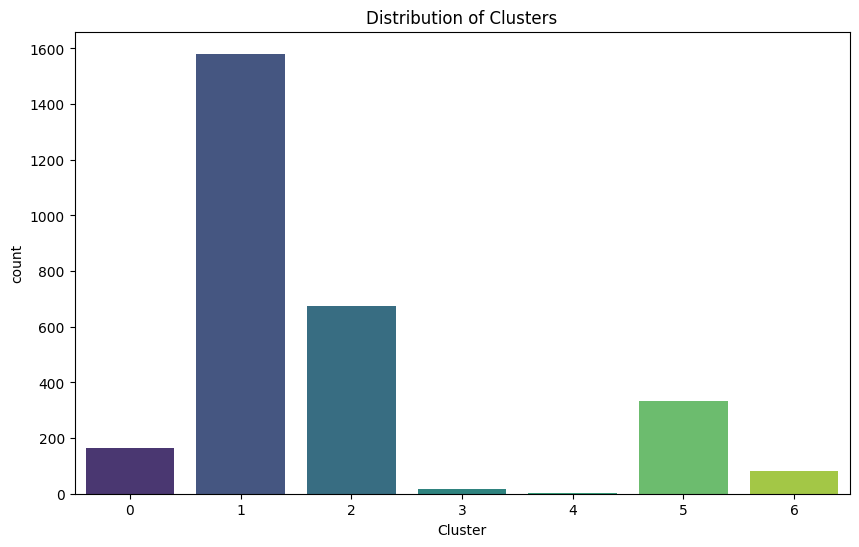

In [19]:
# Select columns related to race and ethnicity
columns_of_interest = [
    'P0010003',  # White alone
    'P0010004',  # Black or African American alone
    'P0010005',  # American Indian and Alaska Native alone
    'P0010006',  # Asian alone
    'P0010007',  # Native Hawaiian and Other Pacific Islander alone
    'P0010008',  # Some Other Race alone
    'P0010009',  # Population of two or more races
]

# Filter data to include only columns of interest
race_data = merged[columns_of_interest]

# Handle missing values (e.g., fill with 0 or use other imputation methods)
race_data.fillna(0, inplace=True)

# Standardize the data
scaler = StandardScaler()
race_data_scaled = scaler.fit_transform(race_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(race_data_scaled)

# Add the cluster labels back to the original data
merged['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=merged, palette='viridis')
plt.title('Distribution of Clusters')
plt.show()

# Optionally, visualize clusters on a map (requires additional steps to join with geographic data)


# **Analyzing and Visualizing Clusters**

## What it is doing:
This section analyzes one of the clusters by calculating its centroid and visualizing the distribution of demographic features within that cluster.

## Why it could be useful:
Analyzing clusters helps to understand the characteristics of specific segments of the population. By examining the centroid and distributions within a cluster, you can gain insights into the common attributes that define the group, which can be used for targeted interventions or services.

## In the case below, I review cluster 1 as it is the dominant cluster within the data. From a business perspective, there could be financial reasons to target cluster 1. The below shows the distributions within that cluster. For example, there are few Native Hawaiian/Pacific Islander individuals within cluster 1. From a marketing perspective, it would save costs if the company removed any targeting campaigns for Native Hawaiians within cluster 1, for example.



Centroid of Cluster 1:
P0010003    753.075269
P0010004     27.587603
P0010005     12.383934
P0010006     22.769133
P0010007      1.206199
P0010008     62.941176
P0010009    112.554080
dtype: float64

Descriptive Statistics of Cluster 1:
          P0010003     P0010004     P0010005     P0010006     P0010007  \
count  1581.000000  1581.000000  1581.000000  1581.000000  1581.000000   
mean    753.075269    27.587603    12.383934    22.769133     1.206199   
std     250.675450    45.573526    11.523997    24.428645     2.113366   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     580.000000     5.000000     5.000000     7.000000     0.000000   
50%     742.000000    11.000000     9.000000    16.000000     0.000000   
75%     937.000000    25.000000    16.000000    30.000000     2.000000   
max    1420.000000   342.000000   147.000000   191.000000    19.000000   

          P0010008     P0010009  
count  1581.000000  1581.000000  
mean     62.941176   112.554

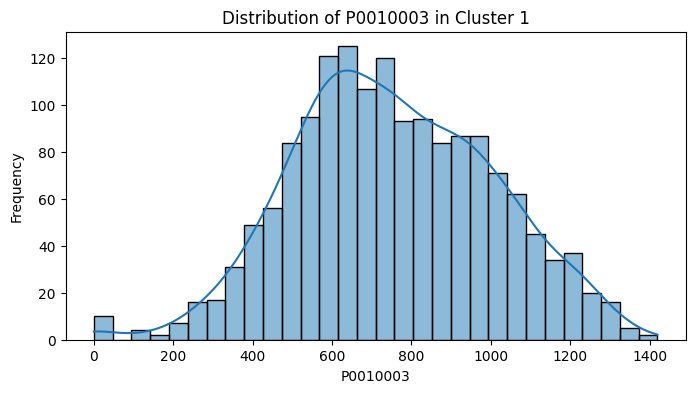

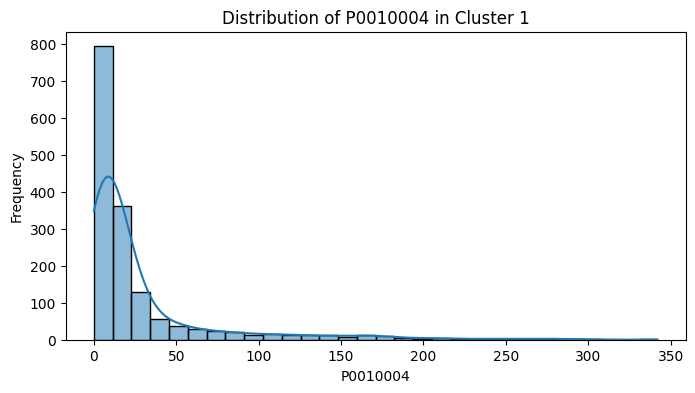

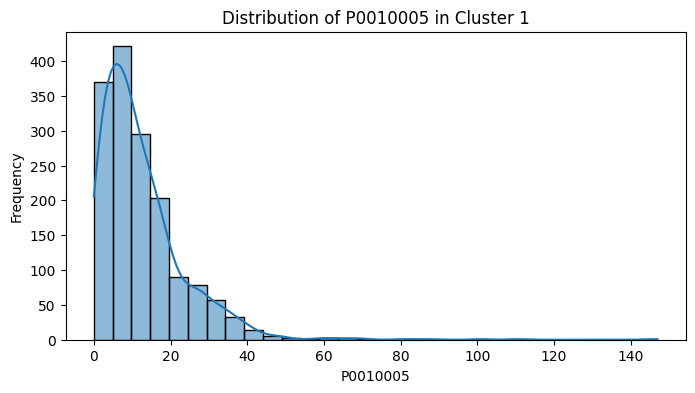

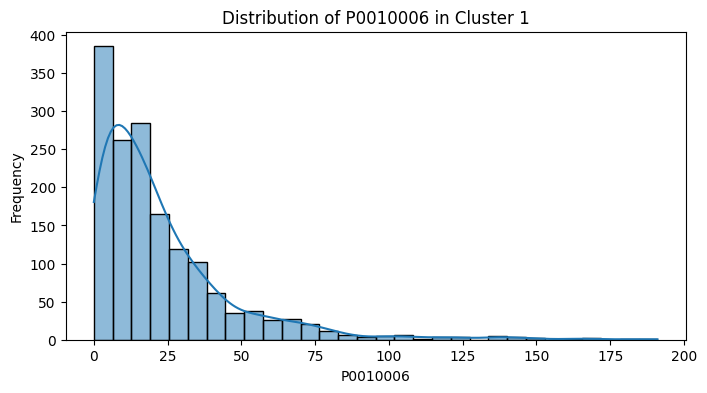

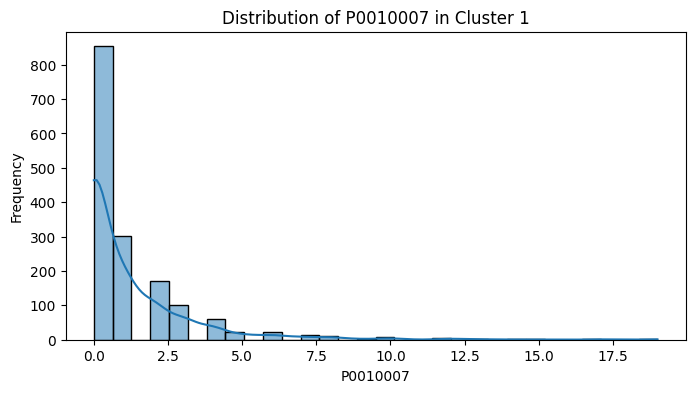

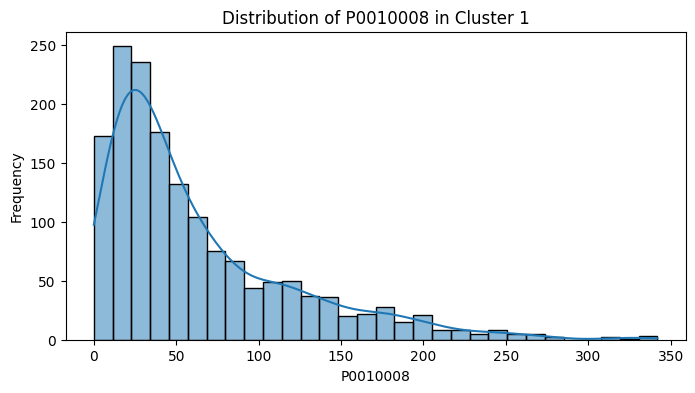

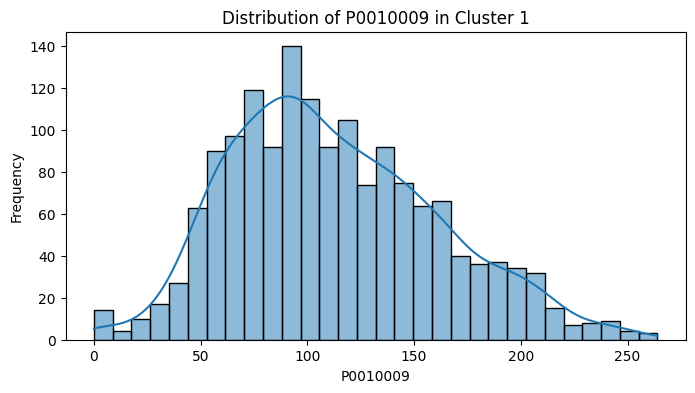

In [20]:
# Get data points in Cluster 1
cluster_1_data = merged[merged['Cluster'] == 1]

# Calculate the centroid of Cluster 1
centroid_1 = cluster_1_data[columns_of_interest].mean()

print("Centroid of Cluster 1:")
print(centroid_1)

# Descriptive statistics of Cluster 1
print("\nDescriptive Statistics of Cluster 1:")
print(cluster_1_data[columns_of_interest].describe())

# Visualizing the features within Cluster 1
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for each feature in Cluster 1
for col in columns_of_interest:
    plt.figure(figsize=(8, 4))
    sns.histplot(cluster_1_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} in Cluster 1')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Distribution of demographic features within cluster 1 (with descriptions)

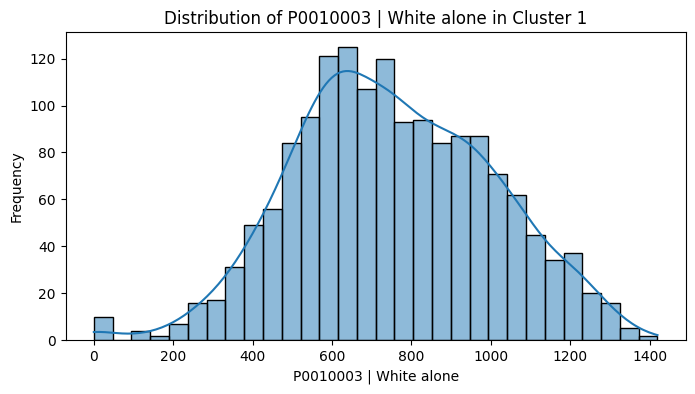

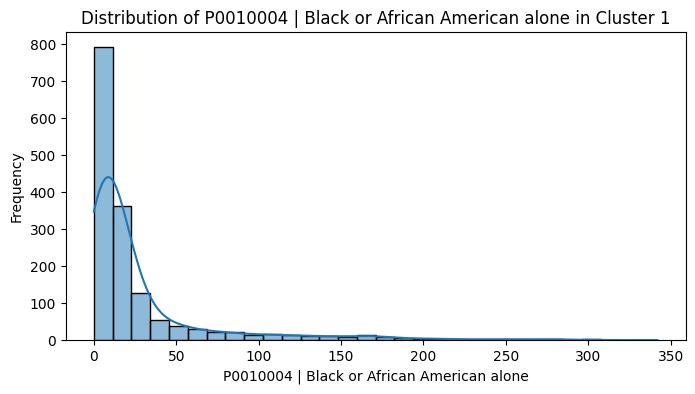

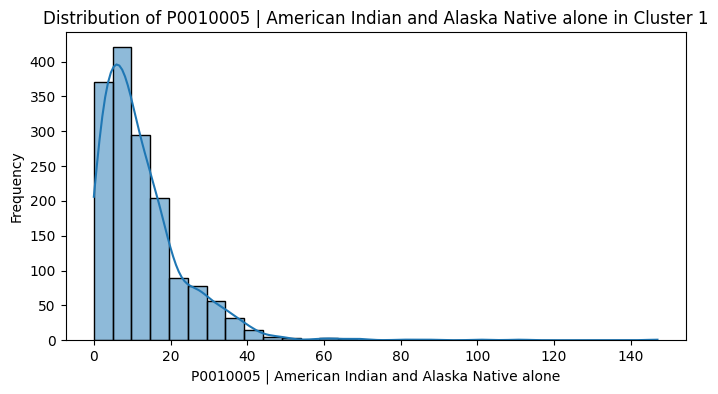

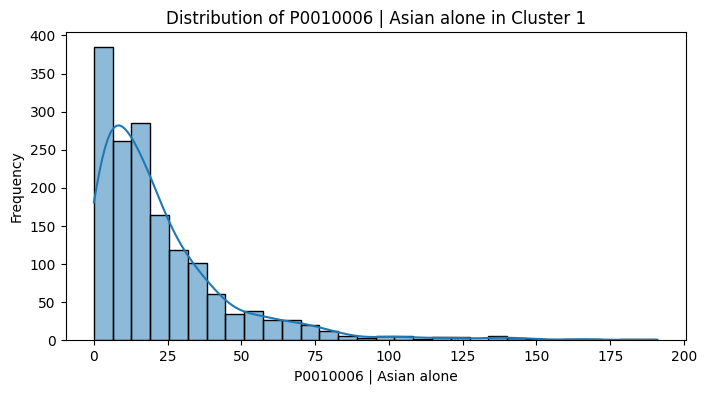

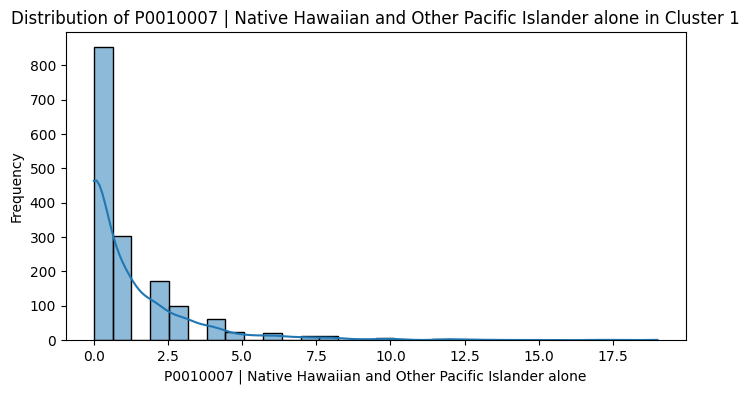

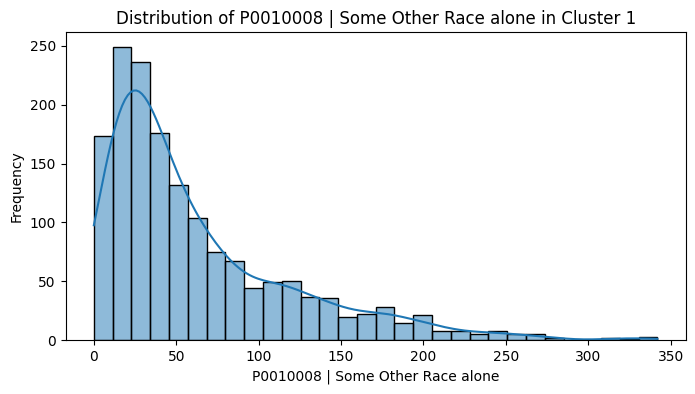

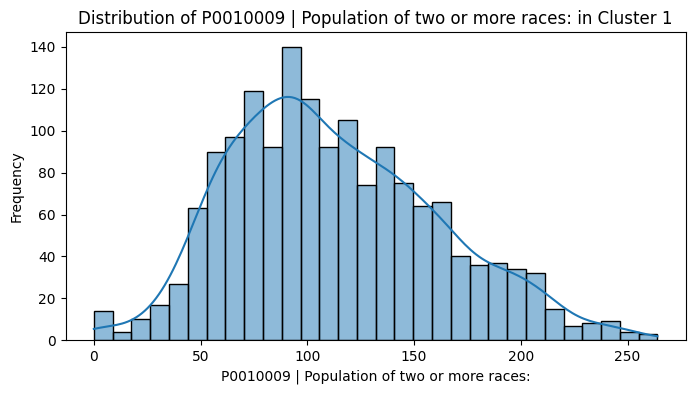

In [21]:
# Create histograms for each feature in Cluster 1 with title including both column name and description
for col in columns_of_interest:
    plt.figure(figsize=(8, 4))

    # Get the column description from the dictionary
    title = column_info.get(col, col)  # Default to column name if description is missing

    sns.histplot(cluster_1_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {title} in Cluster 1')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()


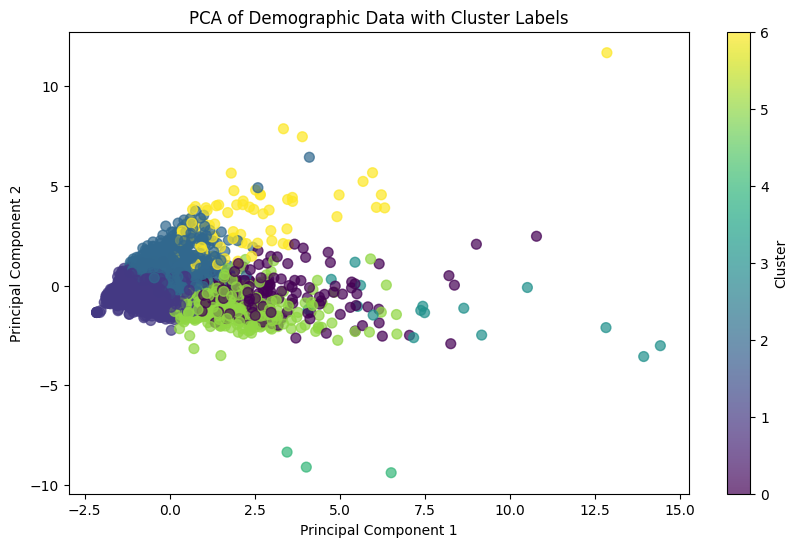

Explained variance by first component: 0.38
Explained variance by second component: 0.19


In [22]:
# Select relevant columns for PCA (could be the same as used in clustering or different based on your analysis)
columns_of_interest = [
    'P0010003',  # White alone
    'P0010004',  # Black or African American alone
    'P0010005',  # American Indian and Alaska Native alone
    'P0010006',  # Asian alone
    'P0010007',  # Native Hawaiian and Other Pacific Islander alone
    'P0010008',  # Some Other Race alone
    'P0010009',  # Population of two or more races
]

# Prepare the data for PCA
pca_data = merged[columns_of_interest].fillna(0)
pca_data_scaled = StandardScaler().fit_transform(pca_data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
pca_result = pca.fit_transform(pca_data_scaled)

# Add PCA results back to the original DataFrame
merged['PCA1'] = pca_result[:, 0]
merged['PCA2'] = pca_result[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(merged['PCA1'], merged['PCA2'], c=merged['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Demographic Data with Cluster Labels')
plt.colorbar(label='Cluster')
plt.show()

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by first component: {explained_variance[0]:.2f}")
print(f"Explained variance by second component: {explained_variance[1]:.2f}")


### Insights from the PCA Plot

1. **Cluster Separation**:
   - Clusters 0, 3, 4, and 6 show some degree of separation in the PCA space, with clusters 0 and 3 being tightly grouped, indicating similar demographics.

2. **Overlapping Clusters**:
   - Clusters 1, 2, and 5 overlap more, suggesting these clusters may require more components to be distinctly separated.

3. **Outliers**:
   - A few points in clusters 2 and 3 are distant from the main group, possibly indicating outliers with unique demographic characteristics.

4. **Cluster 6**:
   - Cluster 6 (yellow) is well-separated, especially along the first principal component, highlighting distinct demographic traits.

### Next Steps:
- **Explore Additional Components**: Consider analyzing the third and fourth principal components to capture more variance.
- **Investigate Demographic Features**: Examine which demographic features drive the separation of clusters, especially in cluster 6.
- **Consider Alternative Clustering Methods**: Methods like DBSCAN or Gaussian Mixture Models might provide different insights, especially given the overlapping clusters.


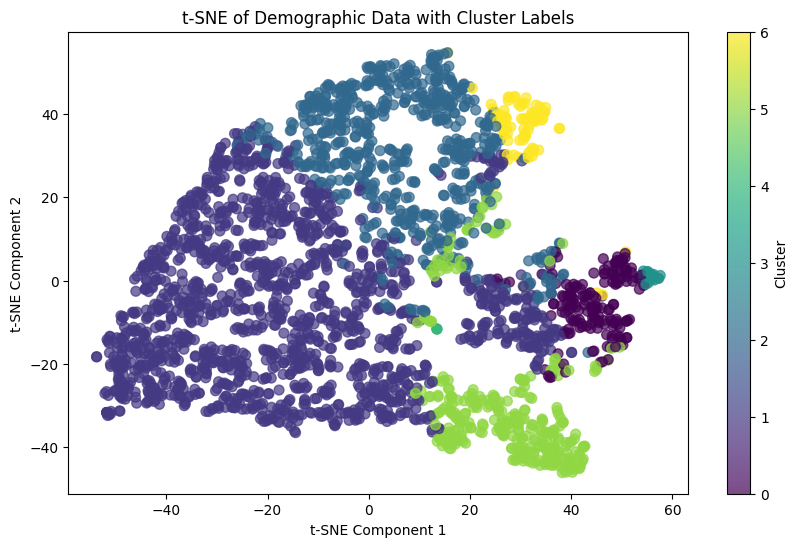

In [23]:
# Prepare the data for t-SNE
columns_of_interest = [
    'P0010003',  # White alone
    'P0010004',  # Black or African American alone
    'P0010005',  # American Indian and Alaska Native alone
    'P0010006',  # Asian alone
    'P0010007',  # Native Hawaiian and Other Pacific Islander alone
    'P0010008',  # Some Other Race alone
    'P0010009',  # Population of two or more races
]

tsne_data = merged[columns_of_interest].fillna(0)
tsne_data_scaled = StandardScaler().fit_transform(tsne_data)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(tsne_data_scaled)

# Add t-SNE results back to the original DataFrame
merged['TSNE1'] = tsne_result[:, 0]
merged['TSNE2'] = tsne_result[:, 1]

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(merged['TSNE1'], merged['TSNE2'], c=merged['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Demographic Data with Cluster Labels')
plt.colorbar(label='Cluster')
plt.show()


### t-SNE Plot Analysis:

#### Cluster Distribution:
- The clusters are distributed across the t-SNE space, with some clusters being more tightly grouped than others.
- Clusters with tighter groupings suggest more homogeneous data within those clusters, while more spread-out clusters may indicate greater diversity or overlap in demographic features.

#### Separation of Clusters:
- There is noticeable separation between some clusters, indicating that t-SNE has successfully identified regions of the data that are distinct in terms of their demographic composition.
- For example, clusters represented by yellow and green seem to be well-separated, suggesting distinct demographic characteristics in those areas.

#### Overlapping Clusters:
- Some clusters overlap or are positioned very close to each other, indicating that these groups share some common demographic features. This might suggest that further refinement, such as increasing the number of clusters or using additional components in PCA, might help in distinguishing these groups more clearly.

#### Outliers and Spread:
- The presence of scattered points around the main cluster bodies could indicate outliers or regions with unique demographic characteristics. These might be worth investigating separately to understand what makes them different.


In [24]:
# Create a dropdown widget for selecting clusters
cluster_dropdown = widgets.Dropdown(
    options=[(f'Cluster {i}', i) for i in range(7)],  # Assuming there are 7 clusters
    description='Select Cluster:',
    style={'description_width': 'initial'}
)

# Function to update the histograms based on the selected cluster
def update_histograms(cluster):
    clear_output(wait=True)  # Clear the previous output

    # Filter data for the selected cluster
    cluster_data = merged[merged['Cluster'] == cluster]

    # Number of columns (features) to plot
    num_cols = len(columns_of_interest)

    # Determine the number of rows and columns for subplots
    num_rows = (num_cols + 2) // 3  # This will create up to 3 plots per row

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier iteration

    # Loop through each feature and plot it in the corresponding subplot
    for i, col in enumerate(columns_of_interest):
        title = column_info.get(col, col)  # Get the column description
        sns.histplot(cluster_data[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {title} in Cluster {cluster}')
        axes[i].set_xlabel(title)
        axes[i].set_ylabel('Frequency')

    # Remove any empty subplots (if the number of columns is not a multiple of 3)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Display the dropdown and bind it to the update function
widgets.interactive(update_histograms, cluster=cluster_dropdown)
display(cluster_dropdown)


Dropdown(description='Select Cluster:', options=(('Cluster 0', 0), ('Cluster 1', 1), ('Cluster 2', 2), ('Clust…

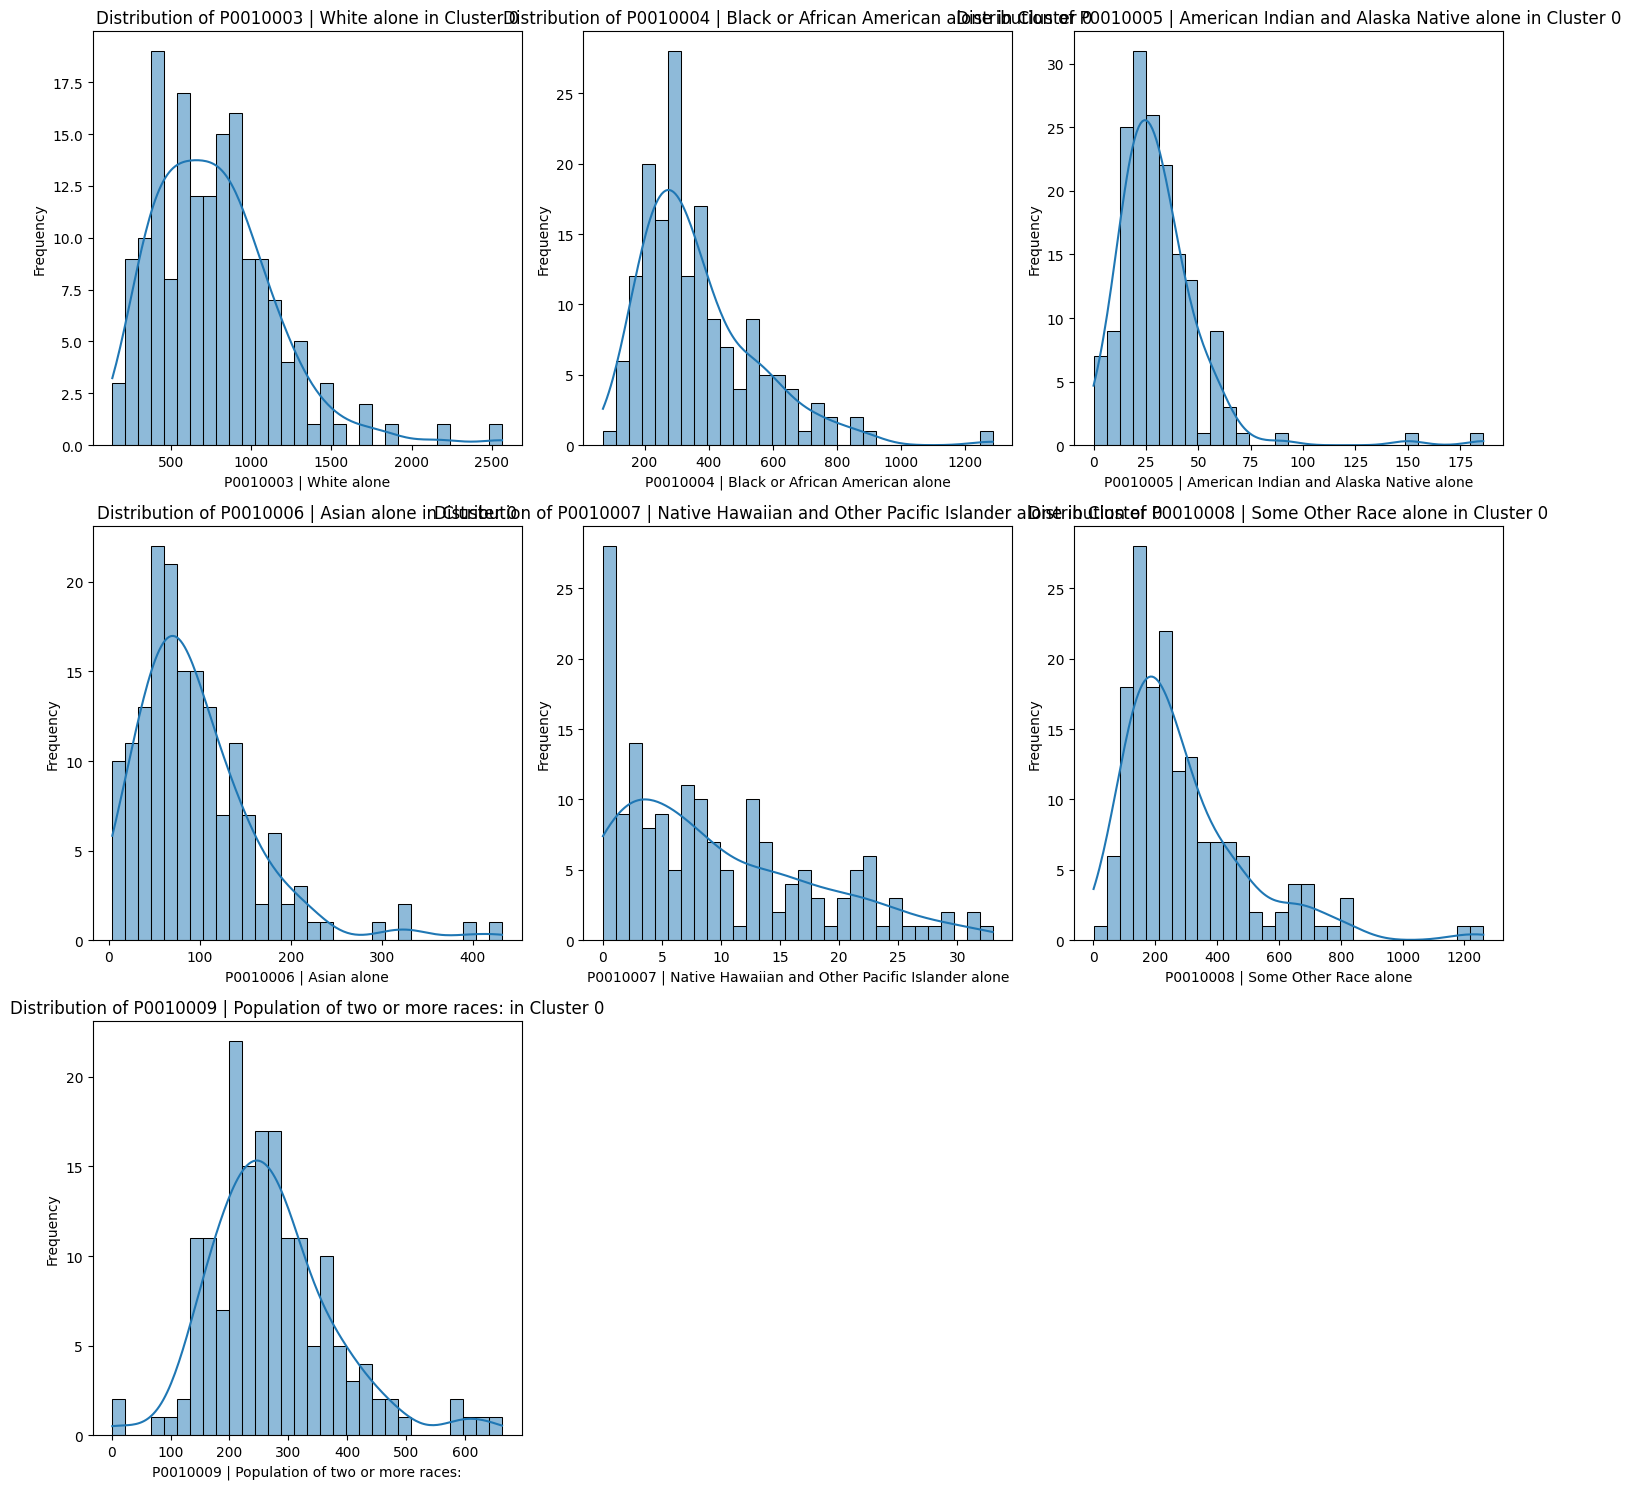

In [25]:
update_histograms(cluster=cluster_dropdown.value)

In [38]:
# Create a dropdown widget for selecting a column
column_dropdown_of_interest = widgets.Dropdown(
    options=[(column_info[col], col) for col in columns_of_interest],
    description='Select Column:',
    style={'description_width': 'initial'}
)

# Function to update the histogram based on the selected column
def update_histogram_column_of_interest(column):
    clear_output(wait=True)  # Clear the previous output

    # Create subplots for 7 clusters (3x3 grid, only using 7 plots)
    fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)
    axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily

    for i in range(7):  # Only loop through 7 clusters
        ax = axes[i]

        # Filter data for the current cluster
        cluster_data = merged[merged['Cluster'] == i]

        # Get the column description from the dictionary
        title = column_info.get(column, column)  # Default to column name if description is missing

        # Plot the histogram in the corresponding subplot
        sns.histplot(cluster_data[column], bins=30, kde=True, ax=ax)
        ax.set_title(f'Cluster {i}')
        ax.set_xlabel(title)
        ax.set_ylabel('Frequency')

    # Hide the last two unused subplots
    for i in range(7, 9):
        axes[i].set_visible(False)

    # Adjust layout to prevent overlap
    plt.suptitle(f'Distribution of {title} across Clusters')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Display the dropdown and bind it to the update function
widgets.interactive(update_histogram_column_of_interest, column=column_dropdown_of_interest)
display(column_dropdown_of_interest)


Dropdown(description='Select Column:', options=(('P0010003 | White alone', 'P0010003'), ('P0010004 | Black or …

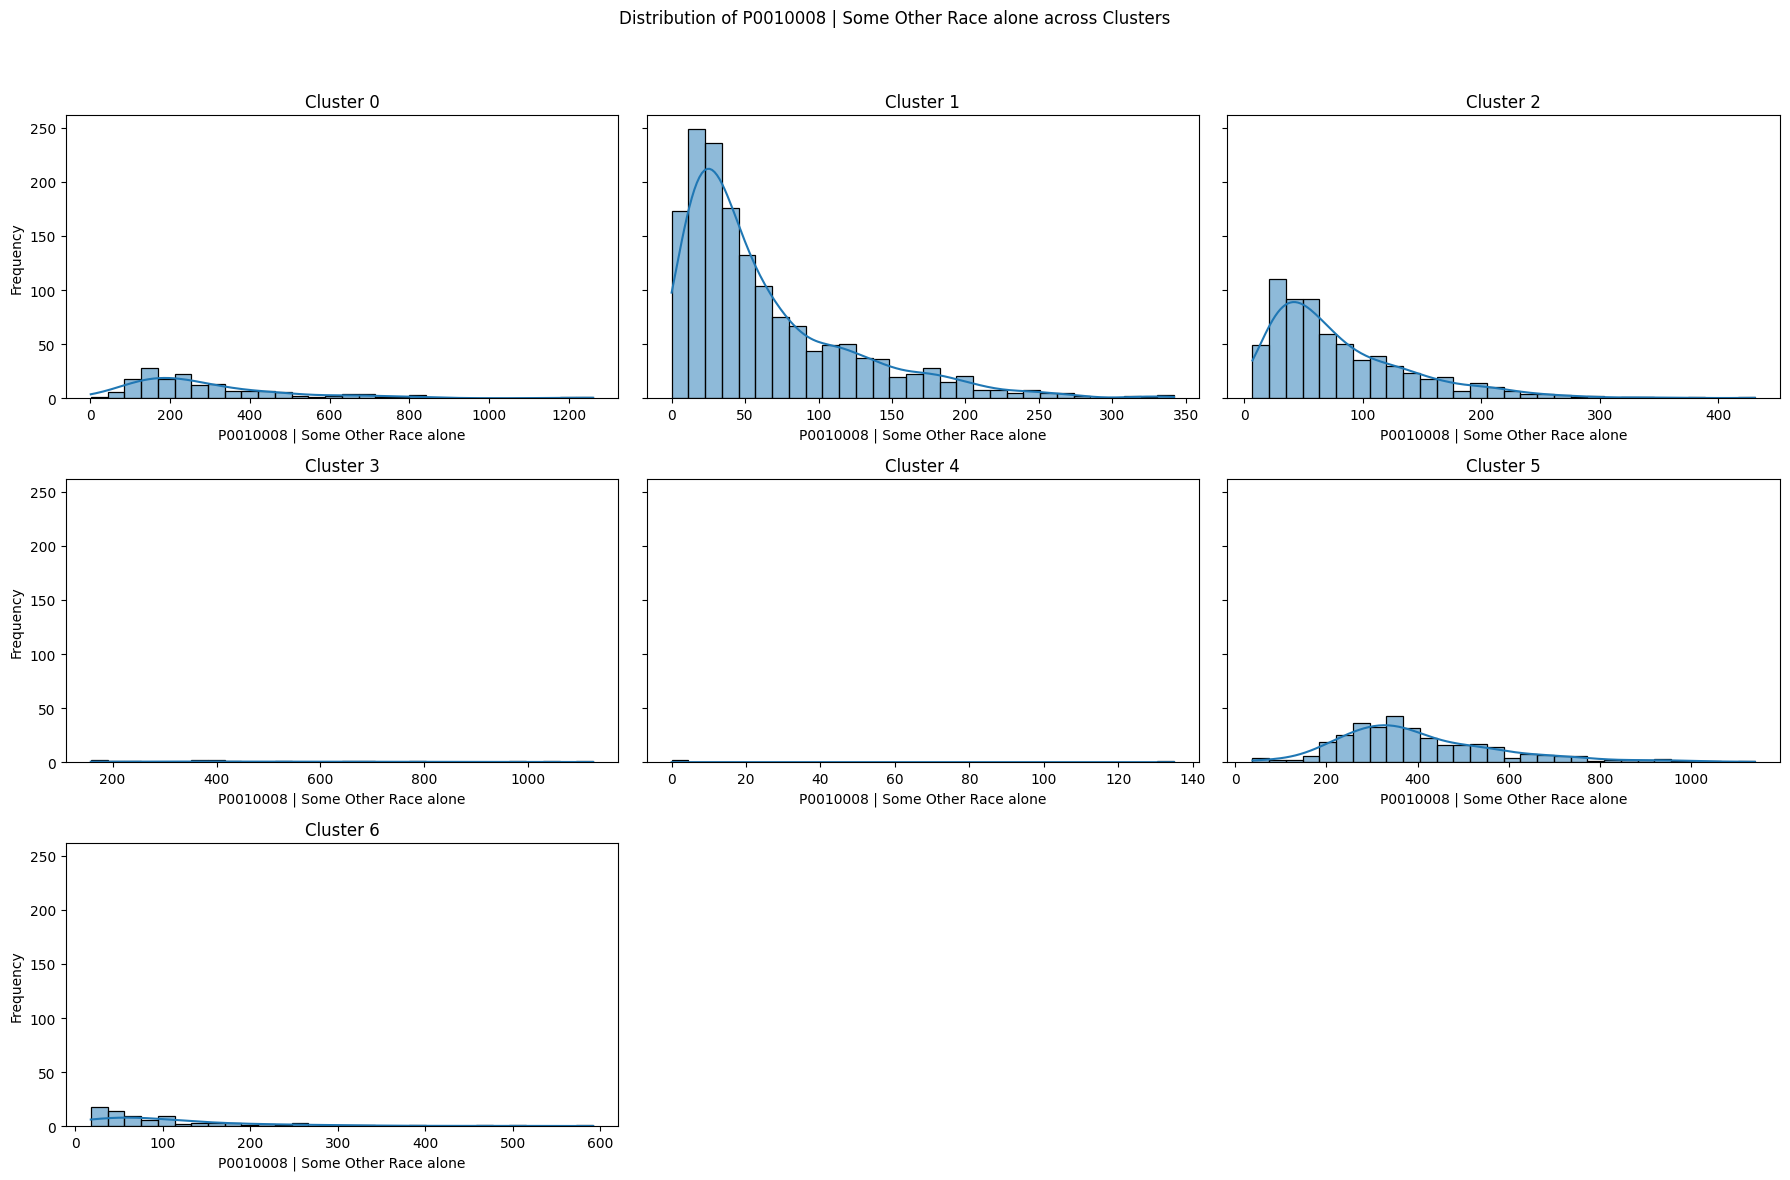

In [43]:
update_histogram_column_of_interest(column_dropdown_of_interest.value)

In [28]:
# Create a dropdown widget for selecting clusters
cluster_dropdown_geo_location = widgets.Dropdown(
    options=[(f'Cluster {i}', i) for i in range(7)],  # Assuming there are 7 clusters
    description='Select Cluster:',
    style={'description_width': 'initial'}
)

# Function to update the map based on the selected cluster
def update_map(cluster):
    clear_output(wait=True)  # Clear the previous output

    # Filter data for the selected cluster
    cluster_data = merged[merged['Cluster'] == cluster]

    # Create a map centered around Colorado
    map_center = [39.5501, -105.7821]  # Approximate center of Colorado
    m = folium.Map(location=map_center, zoom_start=7)

    # Add polygons for each geometry in the selected cluster
    folium.GeoJson(cluster_data[['geometry']]).add_to(m)

    # Add HeatMap (optional, to show concentration)
    heat_data = [[point.xy[1][0], point.xy[0][0]] for point in cluster_data.geometry.centroid]
    HeatMap(heat_data, radius=10, max_zoom=13).add_to(m)

    # Display the map
    display(m)

# Display the dropdown and bind it to the update function
widgets.interactive(update_map, cluster=cluster_dropdown_geo_location)
display(cluster_dropdown_geo_location)


Dropdown(description='Select Cluster:', options=(('Cluster 0', 0), ('Cluster 1', 1), ('Cluster 2', 2), ('Clust…

In [49]:
update_map(cluster=cluster_dropdown_geo_location.value)

<ipython-input-28-32c0b0b512a6>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  heat_data = [[point.xy[1][0], point.xy[0][0]] for point in cluster_data.geometry.centroid]


In [30]:
# Sum the values for each column across all GEOIDs
column_sums = merged[columns_of_interest].sum()

# Calculate the total sum across all columns
total_sum = column_sums.sum()

# Calculate the percentage for each column based on the total sum
percentages = (column_sums / total_sum) * 100

# Print out the percentages with both name and description
print("Percentage Composition (should sum to 100%):")
for col, pct in percentages.items():
    description = column_info.get(col, col)  # Get the description, defaulting to the column name if not found
    print(f"{col} | {description}: {pct:.2f}%")

# Optionally, convert to a DataFrame for better visualization
percentages_df = pd.DataFrame({
    'Description': [column_info.get(col, col) for col in percentages.index],
    'Percentage': percentages.values
})
print("\nPercentages DataFrame:")
print(percentages_df)

Percentage Composition (should sum to 100%):
P0010003 | P0010003 | White alone: 69.45%
P0010004 | P0010004 | Black or African American alone: 4.06%
P0010005 | P0010005 | American Indian and Alaska Native alone: 1.41%
P0010006 | P0010006 | Asian alone: 3.32%
P0010007 | P0010007 | Native Hawaiian and Other Pacific Islander alone: 0.17%
P0010008 | P0010008 | Some Other Race alone: 8.94%
P0010009 | P0010009 | Population of two or more races:: 12.66%

Percentages DataFrame:
                                         Description  Percentage
0                             P0010003 | White alone   69.446375
1         P0010004 | Black or African American alone    4.056563
2  P0010005 | American Indian and Alaska Native a...    1.405731
3                             P0010006 | Asian alone    3.319355
4  P0010007 | Native Hawaiian and Other Pacific I...    0.169398
5                   P0010008 | Some Other Race alone    8.939969
6        P0010009 | Population of two or more races:   12.662609


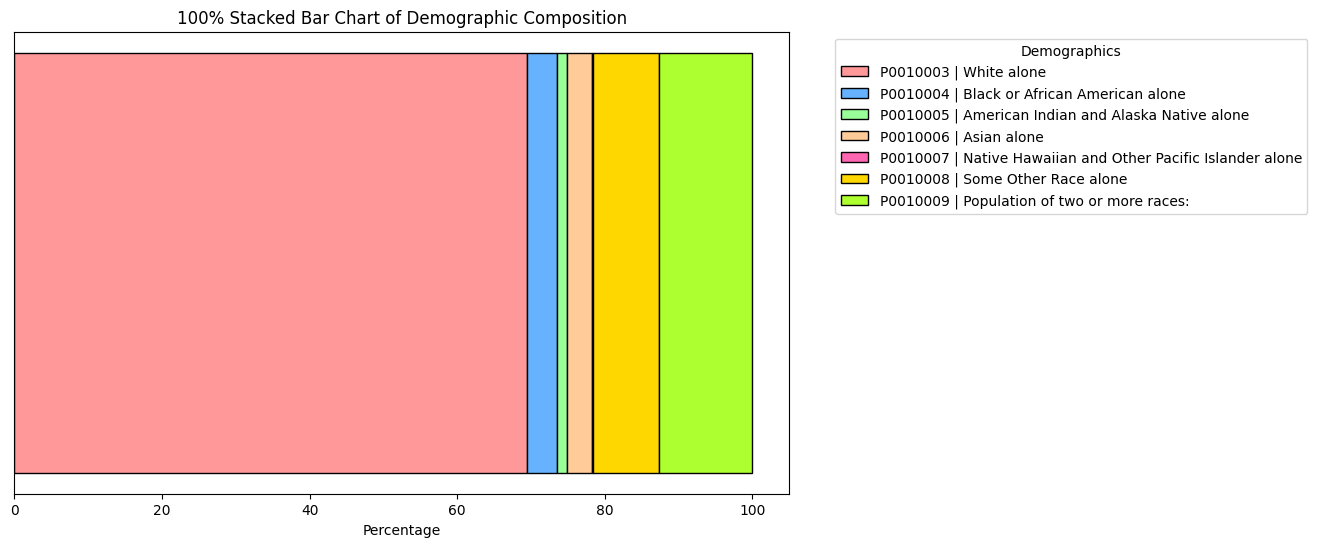

In [31]:
import matplotlib.pyplot as plt

# Assuming percentages_df is your DataFrame containing the percentage data
# and `Description` is the column with the labels, and `Percentage` has the calculated values

# Data for plotting
labels = percentages_df['Description']
percentages = percentages_df['Percentage']

# Define a list of colors for each segment
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF66B2', '#FFD700', '#ADFF2F']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a horizontal stacked bar with different colors
left = 0
for i in range(len(percentages)):
    ax.barh(y=0, width=percentages.iloc[i], left=left, color=colors[i], edgecolor='black', label=labels.iloc[i])
    left += percentages.iloc[i]

# Add the legend, label, and title
ax.legend(title='Demographics', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Percentage')
ax.set_title('100% Stacked Bar Chart of Demographic Composition')

# Hide y-axis labels and ticks since there's only one bar
ax.get_yaxis().set_visible(False)

# Display the plot
plt.show()
